In [1]:
import math
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Исходные данные:

In [8]:
g = 9.80665
#Нач. координаты пуска ракеты:
x_r = 0
y_r = 0
Vsr = 700

#Нач. данные нахождения цели:
x_c = 19000
y_c = 7500
V_c = 250
θ_c = 180 * (np.pi / 180)

#Радиус поражения боевой части ОФ ракеты:
r_explosion = 50

#Расчёты углов:
if x_c > 0:
    ω = math.atan(y_c / x_c) 
else:
    ω = math.atan(y_c / x_c) + np.pi
φ = 10 * (np.pi / 180) #угол упреждения
θ_r = ω + φ
a = 5 #коэффициент пропорциональности 
β0 = θ_r - a * ω

print (f' θr = {θ_r*180/np.pi} \n ω = {ω*180/np.pi} \n β0 = {β0*180/np.pi}')

 θr = 31.540975918538443 
 ω = 21.54097591853844 
 β0 = -76.16390367415376


In [9]:
def func_Vr(t):
    t0 = 4
    t1 = 12
    if t <= t0:
        return ((850/ 4) * t)
    if t0 < t <= t1:
        return (-8.75 * t + 885)
    if t1 < t:
        return (-22.50 * t + 1050)

def func_r(x_r, y_r, x_c, y_c):
    return (np.sqrt((x_c - x_r) ** 2 + (y_c - y_r) ** 2))

def func_θ1(t):
    #маневрирующая цель
    tt = 10
    if t < tt:
        return θ_c
    else:
        return 180 * (math.pi / 180) - ((t - tt) / 30) * 180 * (math.pi / 180) * ((1 + (t - tt) / 10) ** 2)
    
def func_θ0(t):
    #неманеврирующая цель
    return θ_c

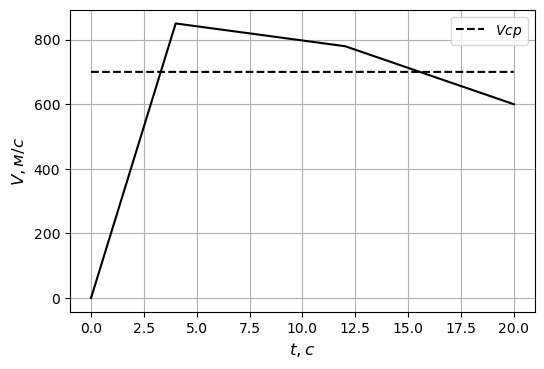

In [10]:
mas_t = np.linspace(0, 20, 5000)
mas_Vср = np.linspace(700, 700, 5000)
mas_V = np.array([])
for t in mas_t:
    mas_V = np.append(mas_V, func_Vr(t))
plt.figure(dpi = 100)
plt.plot(mas_t, mas_V, color = 'black')
plt.plot(mas_t, mas_Vср, color = 'black', linestyle = 'dashed', label = '$Vср$')
plt.xlabel('$t, с$', fontsize=12)
plt.ylabel('$V, м/с$', fontsize=12)
plt.legend(fontsize = 10)
plt.grid()

In [11]:
t = 0
dt = 0.001
arr_t = np.array([])
arr_θ = np.array([θ_r])
arr_dθ = np.array([])
arr_xc = np.array([x_c])
arr_xr = np.array([x_r])
arr_yc = np.array([y_c])
arr_yr = np.array([y_r])
arr_V = np.array([])
while func_r(x_r, y_r, x_c, y_c) > r_explosion and t < 50:
    Δ_lc = V_c * dt
    Vr = func_Vr(t)
    arr_V = np.append(arr_V, Vr)
    Δ_lr = Vr * dt
    θ_c = func_θ0(t)
    x_c = x_c + Δ_lc * np.cos(θ_c)
    y_c = y_c + Δ_lc * np.sin(θ_c)
    x_r = x_r + Δ_lr * np.cos(θ_r)
    y_r = y_r + Δ_lr * np.sin(θ_r)
    arr_xc = np.append(arr_xc, x_c)
    arr_xr = np.append(arr_xr, x_r)
    arr_yc = np.append(arr_yc, y_c)
    arr_yr = np.append(arr_yr, y_r)
    
    if (y_c - y_r) / (x_c - x_r) < 0:
        ω = math.atan((y_c - y_r) / (x_c - x_r)) + np.pi
    else:
        ω = math.atan((y_c - y_r) / (x_c - x_r))
        
    θ_r_pred = θ_r
    θ_r = a * ω + β0
    arr_θ = np.append(arr_θ, θ_r)
    arr_dθ = np.append(arr_dθ, θ_r - θ_r_pred)
    t += dt
    arr_t = np.append(arr_t, t)
    
print(f'Время полёта ракеты t = {t} c.')

Время полёта ракеты t = 22.661000000004712 c.


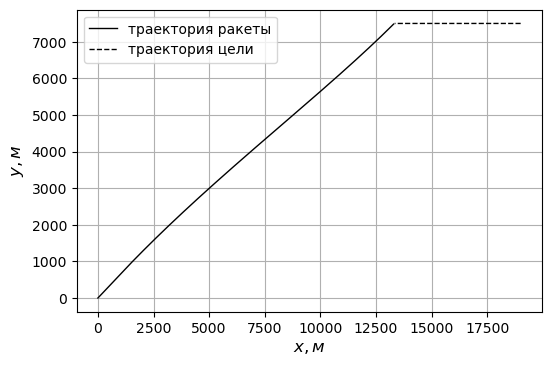

In [12]:
plt.figure(dpi = 100)
#ax = plt.axes(xlim=(0, 6000), ylim=(0, 6000))
ax.set_aspect("equal")
plt.plot(arr_xr, arr_yr, label = 'траектория ракеты', color="black", linewidth = 1)
plt.plot(arr_xc, arr_yc, label = 'траектория цели', color="black",  linestyle = 'dashed', linewidth = 1)
plt.xlabel('$x, м$', fontsize=12)
plt.ylabel('$y, м$', fontsize=12)
plt.legend(fontsize = 10)
plt.grid()

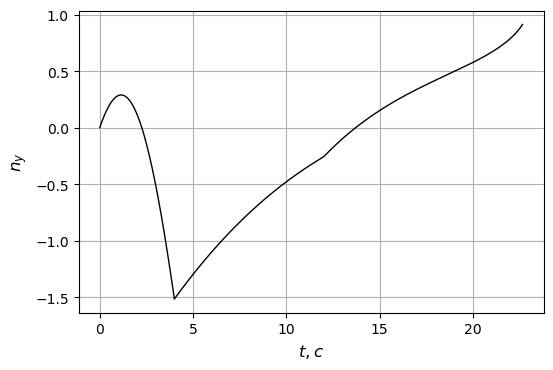

In [22]:
g = 9.80665
arr_ny = (arr_V / g) * (arr_dθ / dt)
plt.figure(dpi = 100)
plt.plot(arr_t, arr_ny, color="black", linewidth = 1)
plt.xlabel('$t, c$', fontsize=12)
plt.ylabel('$n_y$', fontsize=12)
plt.grid()

In [85]:
def direct_task(x_c, y_c, x_r = 0, y_r = 0):
    
    if x_c <= -1:
        ω = math.atan(y_c / x_c) + np.pi
    else:
        if -1 < x_c < 1:
            ω = 0.5 * np.pi
        else:
            ω = math.atan(y_c / x_c)
    φ = 10 * (np.pi / 180) #угол упреждения
    θ_r = ω + φ
    a = 5 #коэффициент пропорциональности 
    β0 = θ_r - a * ω
    t = 0
    dt = 0.01
    arr_t = np.array([])
    arr_dθ = np.array([])
    arr_xc = np.array([x_c])
    arr_xr = np.array([x_r])
    arr_yc = np.array([y_c])
    arr_yr = np.array([y_r])
    arr_V = np.array([])
    while func_r(x_r, y_r, x_c, y_c) > r_explosion and t < 50:
        Δ_lc = V_c * dt
        Vr = func_Vr(t)
        arr_V = np.append(arr_V, Vr)
        Δ_lr = Vr * dt
        θ_c = func_θ0(t)
        x_c = x_c + Δ_lc * np.cos(θ_c)
        y_c = y_c + Δ_lc * np.sin(θ_c)
        x_r = x_r + Δ_lr * np.cos(θ_r)
        y_r = y_r + Δ_lr * np.sin(θ_r)
        arr_xc = np.append(arr_xc, x_c)
        arr_xr = np.append(arr_xr, x_r)
        arr_yc = np.append(arr_yc, y_c)
        arr_yr = np.append(arr_yr, y_r)

        if (y_c - y_r) / (x_c - x_r) < 0:
            ω = math.atan((y_c - y_r) / (x_c - x_r)) + np.pi
        else:
            ω = math.atan((y_c - y_r) / (x_c - x_r))
        
        θ_r_pred = θ_r
        θ_r = a * ω + β0
        arr_dθ = np.append(arr_dθ, θ_r - θ_r_pred)
        t += dt
        arr_t = np.append(arr_t, t)
    arr_ny = (arr_V / g) * (arr_dθ / dt)
    nymax = np.max(np.fabs(arr_ny))
    return x_c, nymax

In [26]:
hmin = 10
h = hmin
dh = 500
ny_r = 16
flag = 0
masxcl = np.array([])
masxcr = np.array([])
masycl = np.array([])
masycr = np.array([])
masxc0l = np.array([])
masxc0r = np.array([])
masyc0l = np.array([])
masyc0r = np.array([])
n = 0
while flag == 0 and n < 15:
    n += 1
    flag = 1
    masfl = np.array([])
    masxc = np.array([])
    masxc0 = np.linspace(- 3000, 10000, 100)
    
    #исключаем координаты меньшие радиуса ликвидирования
    if h <= r_explosion:
        usl1 = - r_explosion <= masxc0
        usl2 = masxc0 <= r_explosion
        usl3 = usl1 * usl2
        mas_ind = np.where(usl3 == True)[0]
        masxc0 = np.delete(masxc0, mas_ind)
    
    #Поиск точек с потребной перегрузкой меньшей располагаемой
    for xc0 in masxc0:
        xc, ny_max = direct_task(xc0, h)
        masxc = np.append(masxc, xc)
        if ny_max <= ny_r:
            masfl = np.append(masfl, 1)
        else:
            masfl = np.append(masfl, - 1)

    for i in range(len(masfl) - 1):
        if masfl[i] * masfl[i + 1] < 0 and flag == 1:
            flag = 0
            ind = i
            masxcl = np.append(masxcl, masxc[i])
            masycl = np.append(masycl, h)
            masxc0l = np.append(masxc0l, masxc0[i])
            masyc0l = np.append(masyc0l, h)
        if masfl[i] * masfl[i + 1] < 0 and i > ind:
            masxcr = np.append(masxcr, masxc[i + 1])
            masycr = np.append(masycr, h)
            masxc0r = np.append(masxc0r, masxc0[i + 1])
            masyc0r = np.append(masyc0r, h)
    h += dh
mas_xc = np.append(masxcl, masxcr[::-1])
mas_yc = np.append(masycl, masycr[::-1])
mas_xc0 = np.append(masxc0l, masxc0r[::-1])
mas_yc0 = np.append(masyc0l, masyc0r[::-1])

(-2513.434343434343, 2204.3434343434346, -140.0, 3160.0)

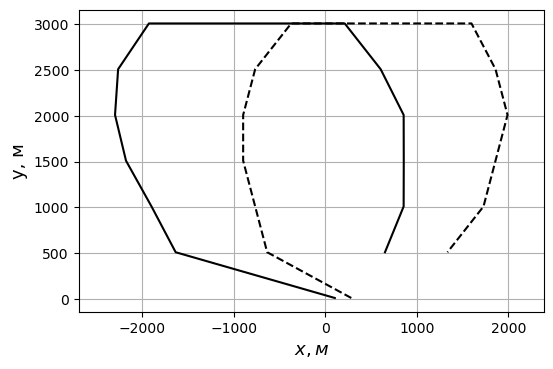

In [27]:
plt.figure(dpi = 100)
plt.plot(mas_xc, mas_yc, color = 'black')
plt.plot(mas_xc0, mas_yc0, color = 'black', linestyle = 'dashed')
plt.xlabel('$x, м$', fontsize=13)
plt.ylabel('y, м', fontsize=13)
plt.grid()
plt.axis('equal')

In [28]:
#правая граница по мертвой зоне пуска
dx = 100
phi = 10 * (math.pi / 180)
omega_max = 85 * (math.pi / 180) - phi
hmax = 6000
mas_h = np.linspace(hmin + 100, hmax, 10)
mas_xmax = mas_h / np.tan(omega_max)
mas_x0 = np.zeros_like(mas_h)
for i in range(len(mas_h)):
    x0 = mas_xmax[i]
    y = mas_h[i]
    x = 0
    while x < mas_xmax[i]:
        x, ny = direct_task(x0, y)
        x0 += dx
    mas_x0[i] = x0 - dx

In [29]:
#левая граница по мертвой зоне поражения
mas_xmaxl = - mas_xmax
mas_xcl = np.zeros_like(mas_h)
for i in range(len(mas_h)):
    x = mas_xmaxl[i]
    y = mas_h[i]
    mas_xcl[i], ny = direct_task(x, y)

(-13358.95788945513, 4834.678632874444, -184.5, 6294.5)

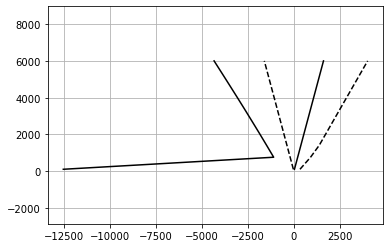

In [30]:
plt.plot(mas_x0, mas_h, color = 'black', linestyle = 'dashed')
plt.plot(mas_xmax, mas_h, color = 'black')
plt.plot(mas_xcl, mas_h, color = 'black')
plt.plot(mas_xmaxl, mas_h, color = 'black', linestyle = 'dashed')
plt.grid(True)
plt.axis('equal')

(-13358.95788945513, 4834.678632874444, -289.5, 6299.5)

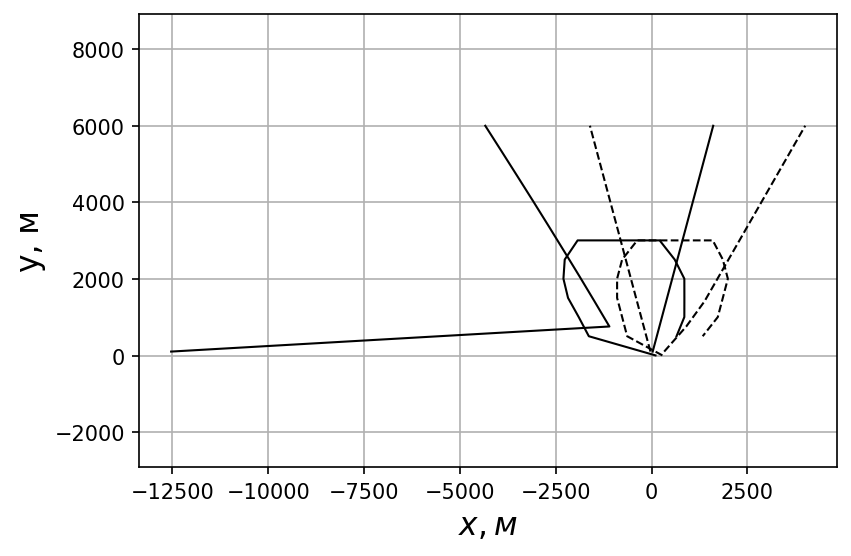

In [31]:
plt.figure(dpi = 150)
plt.plot(mas_xc, mas_yc, color = 'black', linewidth = 1)
plt.plot(mas_xc0, mas_yc0, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.xlabel('$x, м$', fontsize=15)
plt.ylabel('y, м', fontsize=15)
plt.plot(mas_x0, mas_h, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.plot(mas_xmax, mas_h, color = 'black', linewidth = 1)
plt.plot(mas_xcl, mas_h, color = 'black', linewidth = 1)
plt.plot(mas_xmaxl, mas_h, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.grid(True)
plt.axis('equal')